# PA 1: Exploratory Analysis over Dataset_R

## Student Details

Student Name and ID: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'dataset_python.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
<b>[2.5 points]</b>

 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_R. The columns of the data-set are:

- Loan Status - Loan approved (Y/N)
- Loan_ID - Unique Loan ID
- Gender - Male/ Female
- Married - Applicant married (Y/N)
- Dependents - Number of dependents
- Education Applicant - Education (Graduate/ Under Graduate)
- Self_Employed Self - employed (Y/N)
- ApplicantIncome - Applicant income
- CoapplicantIncome - Coapplicant income
- LoanAmount - Loan amount in thousands
- Loan_Amount_Term - Term of loan in months
- Credit_History - credit history meets guidelines
- Property_Area - Urban/ Semi Urban/ Rural)

In [2]:
# Import R packages 
library('dplyr')
library('ggplot2')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [84]:
# Read the file
loan_df <- read.csv('C:\\Users\\Administrator\\Desktop\\Assignment1UPDATED\\dataset_R.csv')

In [85]:
# return the first 5 rows of the dataset
head(loan_df,5)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP001002,Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


# Task 1: Statistical Exploratory Data Analysis(17.5 points)

In [86]:
# 1-a If any, print the total number of null values for each column in the dataset. Explain how you handle the null values (Hint: Null values must be filled or dropped from the dataset accordingly. How you handle the null values is upto you)
#sapply(loan_df,function(loan_df) sum(is.na(loan_df)))
summary(loan_df)

     Loan_ID       Gender    Married   Dependents        Education  
 LP001002:  1         : 13      :  3     : 15     Graduate    :480  
 LP001003:  1   Female:112   No :213   0 :345     Not Graduate:134  
 LP001005:  1   Male  :489   Yes:398   1 :102                       
 LP001006:  1                          2 :101                       
 LP001008:  1                          3+: 51                       
 LP001011:  1                                                       
 (Other) :608                                                       
 Self_Employed ApplicantIncome CoapplicantIncome   LoanAmount   
    : 32       Min.   :  150   Min.   :    0     Min.   :  9.0  
 No :500       1st Qu.: 2878   1st Qu.:    0     1st Qu.:100.0  
 Yes: 82       Median : 3812   Median : 1188     Median :128.0  
               Mean   : 5403   Mean   : 1621     Mean   :146.4  
               3rd Qu.: 5795   3rd Qu.: 2297     3rd Qu.:168.0  
               Max.   :81000   Max.   :41667     Max.   :7

In [87]:
# 1-b Print the details of dataframe
str(loan_df)

'data.frame':	614 obs. of  13 variables:
 $ Loan_ID          : Factor w/ 614 levels "LP001002","LP001003",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Gender           : Factor w/ 3 levels "","Female","Male": 3 3 3 3 3 3 3 3 3 3 ...
 $ Married          : Factor w/ 3 levels "","No","Yes": 2 3 3 3 2 3 3 3 3 3 ...
 $ Dependents       : Factor w/ 5 levels "","0","1","2",..: 2 3 2 2 2 4 2 5 4 3 ...
 $ Education        : Factor w/ 2 levels "Graduate","Not Graduate": 1 1 1 2 1 1 2 1 1 1 ...
 $ Self_Employed    : Factor w/ 3 levels "","No","Yes": 2 2 3 2 2 3 2 2 2 2 ...
 $ ApplicantIncome  : int  5849 4583 3000 2583 6000 5417 2333 3036 4006 12841 ...
 $ CoapplicantIncome: num  0 1508 0 2358 0 ...
 $ LoanAmount       : int  NA 128 66 120 141 267 95 158 168 349 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ Property_Area    : Factor w/ 3 levels "Rural","Semiurban",..: 3 1 3 3 3 3 3 2 3 2 ...
 $ Loan_Status      : Factor w/ 2 le

In [88]:
# 1-c Find the number of rows and columns in dataset
print(paste0('Total number of rows:', nrow(loan_df)))
print(paste0('Total number of columns:', ncol(loan_df)))

[1] "Total number of rows:614"
[1] "Total number of columns:13"


In [89]:
# 1-d Print descriptive detail of a column in dataset
summary(loan_df$ApplicantIncome)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    150    2878    3812    5403    5795   81000 

In [99]:
# Data Pre-processing for R
loan_df <- read.csv('C:\\Users\\Administrator\\Desktop\\Assignment1UPDATED\\dataset_R.csv',na.strings= c("","NA"))

# Task 2: Aggregation & Filtering & Rank (30 points)

In [91]:
# Task 2-a: Find out the number of graduates from rural area
loan_df %>%
filter( Education == 'Graduate' & Property_Area == 'Rural' ) %>%
nrow()


[1] 131

In [92]:
# Task 2-b: determine the overall number of men who did not graduate
loan_df %>%
filter( Education == 'Not Graduate' & Gender == 'Male' ) %>%
nrow()

[1] 113

In [93]:
# Task 2-c: Find the top 10 men who graduated and had the highest applicant income
loan_df %>%
 arrange(-ApplicantIncome) %>%
filter( Education == 'Graduate' & Gender == 'Male' ) %>% 
#select(Loan_ID) %>%
 #loan_df(loan_df$Education == 'Graduate',) %>%
 head(10)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
LP002317,Male,Yes,3+,Graduate,No,81000,0,360,360,0,Rural,N
LP002101,Male,Yes,0,Graduate,,63337,0,490,180,1,Urban,Y
LP001536,Male,Yes,3+,Graduate,No,39999,0,600,180,0,Semiurban,Y
LP001640,Male,Yes,0,Graduate,Yes,39147,4750,120,360,1,Semiurban,Y
LP002422,Male,No,1,Graduate,No,37719,0,152,360,1,Semiurban,Y
LP001637,Male,Yes,1,Graduate,No,33846,0,260,360,1,Semiurban,N
LP002624,Male,Yes,0,Graduate,No,20833,6667,480,360,NA,Urban,Y
LP001922,Male,Yes,0,Graduate,No,20667,0,NA,360,1,Rural,N
LP001996,Male,No,0,Graduate,No,20233,0,480,360,1,Rural,N
LP001469,Male,No,0,Graduate,Yes,20166,0,650,480,NA,Urban,Y


In [94]:
# Task 2-d: Find the number of self-employed male applicants from urban area 
loan_df %>%
filter( Self_Employed == 'Yes' & Gender == 'Male' & Property_Area == 'Urban' ) %>%
nrow()

[1] 19

# Task 3: Visualization (30 points)

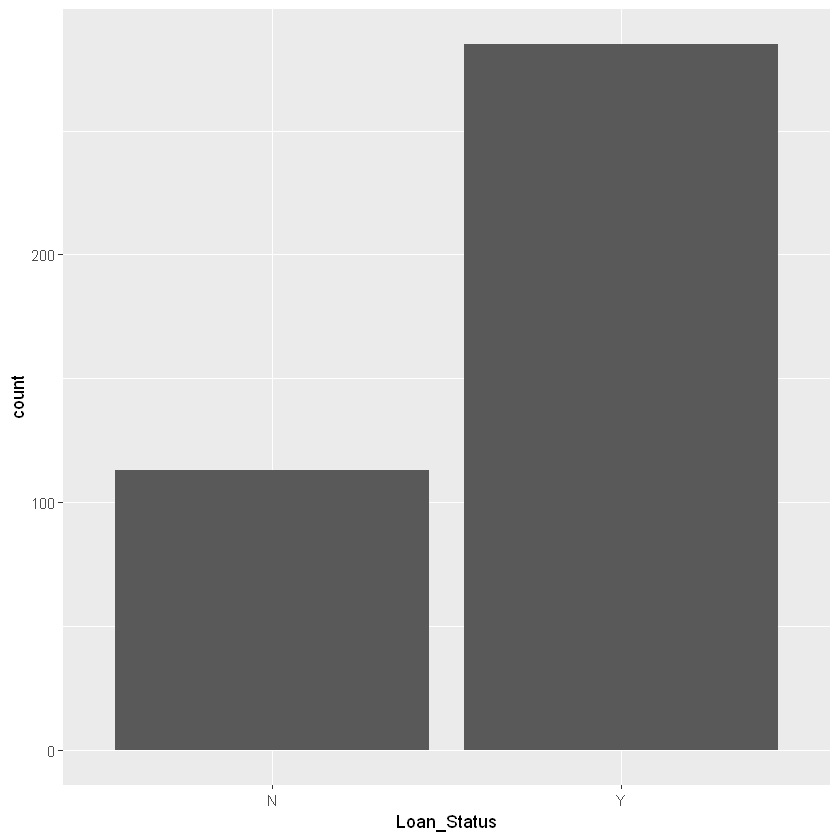

In [95]:
# Task 3-a Make a plot where married applicants are granted loans
dump <- subset(loan_df, Married == 'Yes')
ggplot(dump,aes(x=Loan_Status)) + geom_bar()

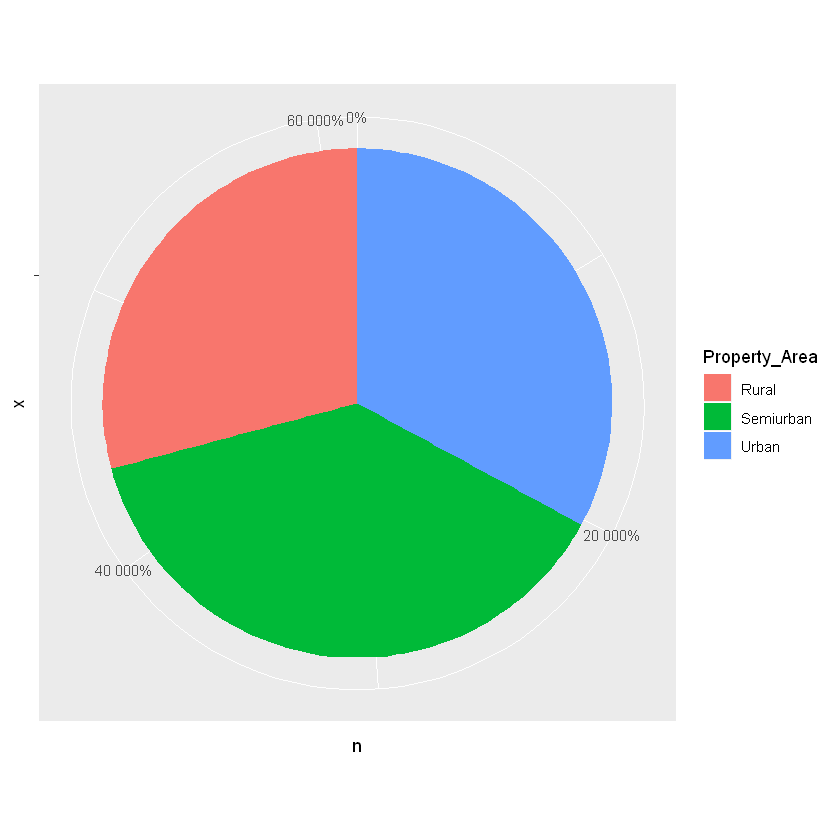

In [98]:
# Task 3-b Create a pie chart for Property_area and display percentages in legend respectively
loan_df %>%
group_by(Property_Area) %>%
tally() %>%
ggplot(aes(x="", y=n, fill=Property_Area)) + geom_bar(stat='identity',width=1)+coord_polar("y", start=0 )  + scale_y_continuous(labels = scales::percent)

# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

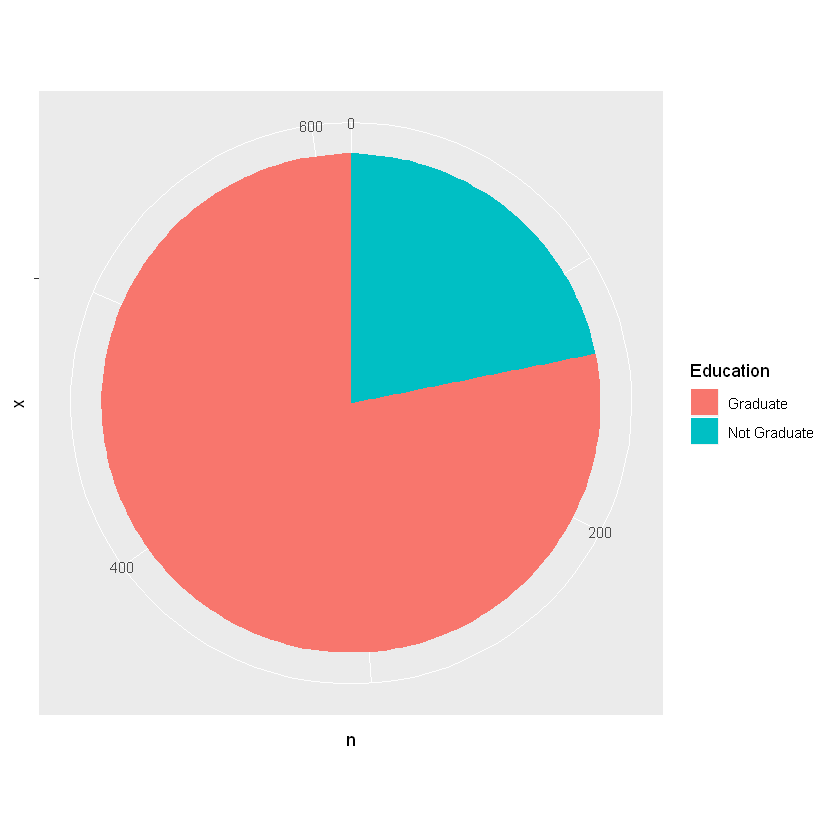

In [19]:
# Code and explaination for loan_df %>%
loan_df %>%
group_by(Education) %>%
tally() %>%
ggplot(aes(x="", y=n, fill=Education)) + geom_bar(stat='identity',width=1)+coord_polar("y", start=0)



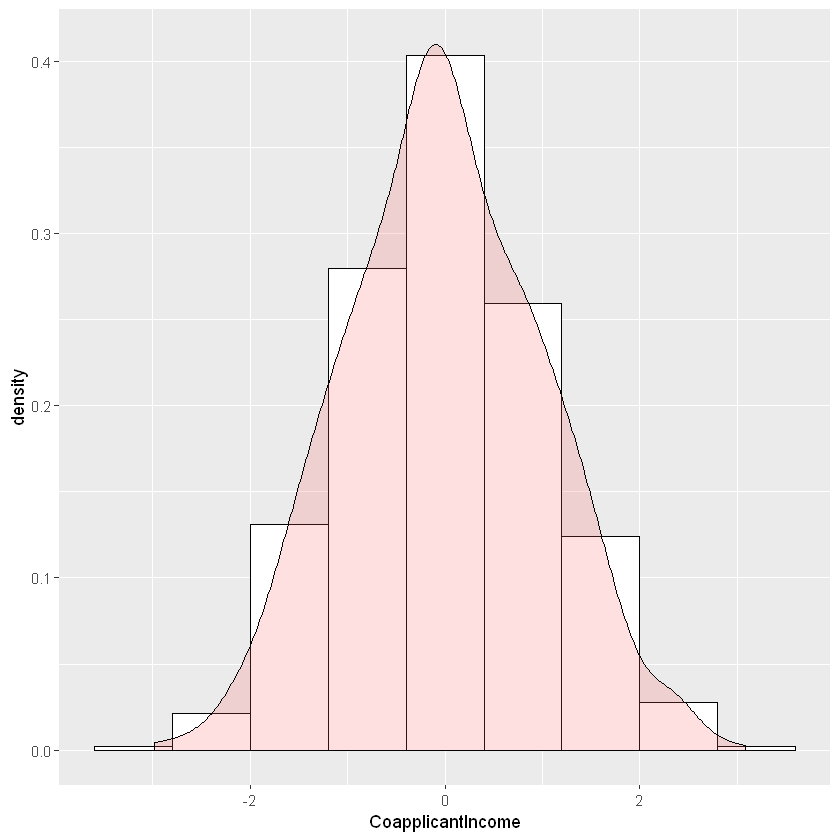

In [46]:
dat <- data.frame(Education = factor(rep(c("A","B"), each = 615)), CoapplicantIncome = c(rnorm(615),rnorm(615)))
ggplot(dat, aes(x = CoapplicantIncome)) + geom_histogram(aes(y =..density..),binwidth=.8, colour ="black",fill="white")+geom_density(alpha=.2,fill="#FF6666")